##### 1.1 Including Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

###### 1.2 reading the dataset

In [2]:
#read the dataset
dataset = pd.read_csv("creditcard.csv")
# read the first 5 and last 5 rows of the data
pd.concat([dataset.head(), dataset.tail()])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## 2.1 Data Exploration and Visualization
###### Now we try to find out the relative proportion of valid and fraudulent credit card transactions:

Fraudulent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


<Axes: ylabel=' '>

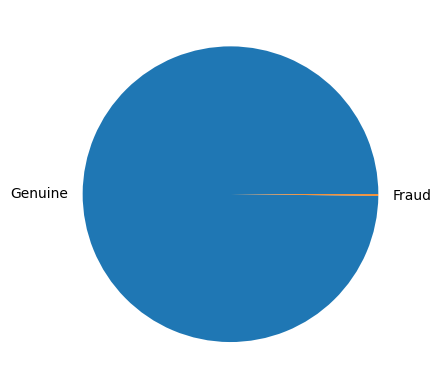

In [3]:
# check for relative proportion 
print("Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])))
print("Valid Transactions: " + str(len(dataset[dataset["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])/ dataset.shape[0]))

# To see how small are the number of Fraud transactions
data_p = dataset.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")

# plot a pie chart
data_p[" "].value_counts().plot(kind="pie")

###### There is an imbalance in the data, with only 0.17% of the total cases being fraudulent.

###### 2.2 Now we look at the distribution of the two named features in the dataset. For Time, it is clear that there was a particular duration in the day when most of the transactions took place:

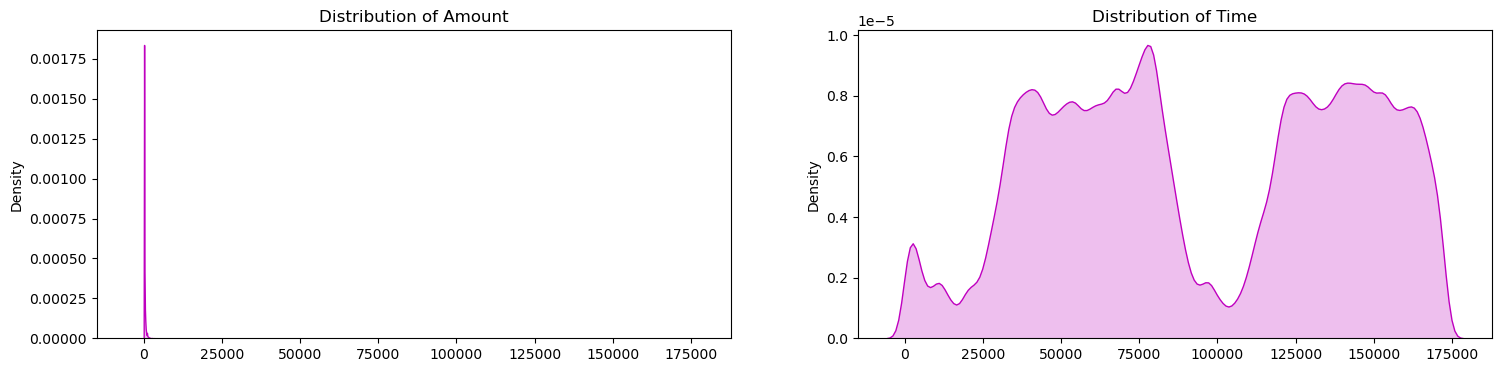

In [4]:
# plot the named features 
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

amount_value = dataset['Amount'].values # values
time_value = dataset['Time'].values # values

sns.kdeplot(x=amount_value, fill=True, bw_adjust=0.5, color="m", ax=axes[0]).set_title('Distribution of Amount')
sns.kdeplot(x=time_value, fill=True, bw_adjust=0.5, color="m", ax=axes[1]).set_title('Distribution of Time')

plt.show()

##### 2.3 Let us check if there is any difference between valid transactions and fraudulent transactions:

In [5]:
print("Average Amount in a Fraudulent Transaction: " + str(dataset[dataset["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(dataset[dataset["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 122.21132113821139
Average Amount in a Valid Transaction: 88.29102242231328


###### As we can notice from this, the average money transaction for the fraudulent ones is more. It makes this problem crucial to deal with. Now let us try to understand the distribution of values in each feature. Let's start with the Amount:

##### 2.4 Summary of amount

In [6]:
print("Summary of the feature - Amount" + "\n-------------------------------")
print(dataset["Amount"].describe())

Summary of the feature - Amount
-------------------------------
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


###### 2.5 The rest of the features don't have any physical interpretation and will be seen through histograms. Here the values are subgrouped according to class (valid or fraud):

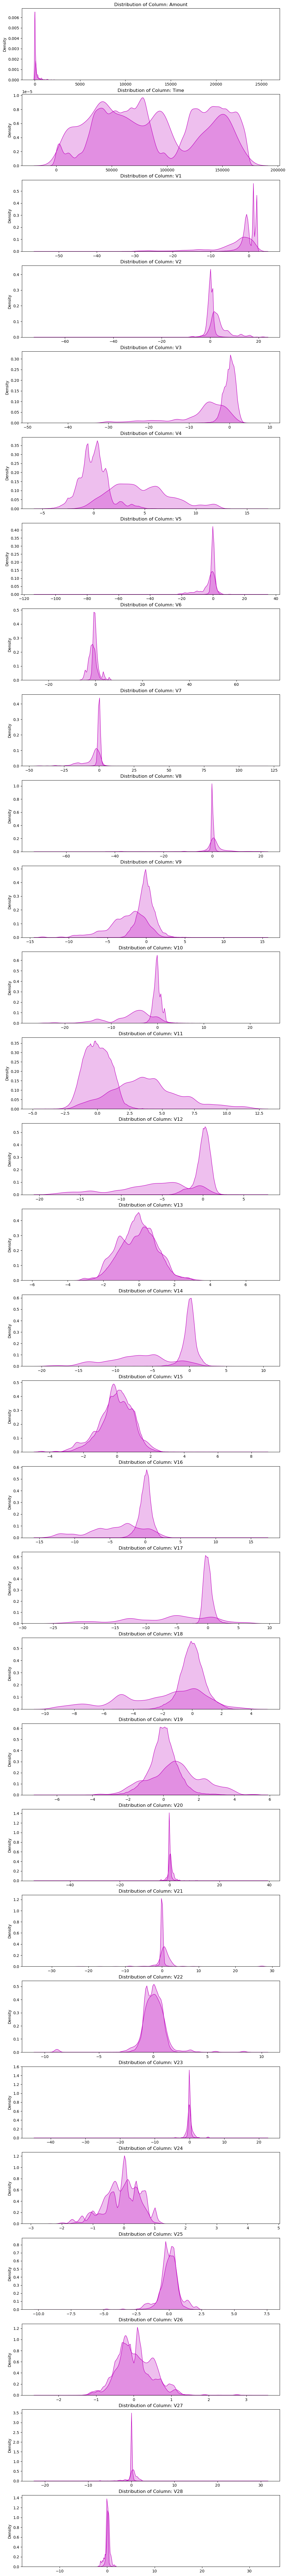

In [7]:
# Reorder the columns Amount, Time then the rest
data_plot = dataset.copy()
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace = True)
data_plot.insert(0, 'Amount', amount)

# Plot the distributions of the features
columns = data_plot.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
 ax = plt.subplot(grids[grid])
 sns.kdeplot(x=data_plot[index][data_plot.Class == 1], fill=True, bw_adjust=0.5, color="m", ax=ax).set_title('Distribution of Column: '  + str(index))
 sns.kdeplot(x=data_plot[index][data_plot.Class == 0], fill=True, bw_adjust=0.5, color="m", ax=ax).set_xlabel("")
plt.show()


###### 2.5 Since the features are created using PCA, feature selection is unnecessary as many features are tiny. Let's see if there are any missing values in the dataset:

In [8]:
# check for null values
dataset.isnull().shape[0]
print("Non-missing values: " + str(dataset.isnull().shape[0]))
print("Missing values: " + str(dataset.shape[0] - dataset.isnull().shape[0]))

Non-missing values: 284807
Missing values: 0


###### 2.6 As there are no missing data, we turn to standardization. We standardize only Time and Amount using RobustScaler:
###### As we saw previously, the Amount column has outliers, that's why we chose RobustScaler() as it's robust to outliers. 

In [9]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(dataset[["Time", "Amount"]])
dataset[["Time", "Amount"]] = scaler.transform(dataset[["Time", "Amount"]])

pd.concat([dataset.head(), dataset.tail()])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0
284806,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0


###### 2.7 Next, let's divide the data into features and targets. We also make the train-test split of the data:

In [10]:
# Separate response and features  Undersampling before cross validation will lead to overfiting
y = dataset["Class"] # target 
X = dataset.iloc[:,0:30]

# Use SKLEARN for the split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

###### 3.1 Let's import all the necessary libraries 

In [12]:
# import the metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

###### 3.2 Let's run RandomForestClassifier on the dataset and see the performance:

In [13]:
# Fit and predict
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 
y_pred = rfc.predict(X_test)

# For the performance let's use some metrics from SKLEARN module
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  
print("The accuracy is", accuracy_score(y_test, y_pred)) 
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

The accuracy is 0.9995786664794073
The precision is 0.9743589743589743
The recall is 0.7755102040816326
The F1 score is 0.8636363636363635


###### 3.3 Let's run LogisticRegression on the dataset and see the performance:

In [14]:
# Fit the logistic regression model with increased max_iter
lr = LogisticRegression(max_iter=1000)  # Increase max_iter from the default 100
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate performance using scikit-learn metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy is", accuracy_score(y_test, y_pred))
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))


The accuracy is 0.9991222218320986
The precision is 0.8636363636363636
The recall is 0.5816326530612245
The F1 score is 0.6951219512195121


###### 3.4 Let's run SVC on the dataset and see the performance:

In [15]:
# Fit the SVC model
svc = SVC()
svc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svc.predict(X_test)

# Evaluate performance using scikit-learn metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy is", accuracy_score(y_test, y_pred))
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

The accuracy is 0.999385555282469
The precision is 0.9701492537313433
The recall is 0.6632653061224489
The F1 score is 0.7878787878787878


###### 3.5 Let's run KNeighbors on the dataset and see the performance

In [16]:
# Fit the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=5)  # Set the number of neighbors to 5
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate performance using scikit-learn metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy is", accuracy_score(y_test, y_pred))
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

The accuracy is 0.9994908886626171
The precision is 0.948051948051948
The recall is 0.7448979591836735
The F1 score is 0.8342857142857143


###### 3.6 Let's run Decision Tree on the dataset and see the performance

In [17]:
# Fit the DecisionTreeClassifier model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dtc.predict(X_test)

# Evaluate performance using scikit-learn metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy is", accuracy_score(y_test, y_pred))
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

The accuracy is 0.9990871107053826
The precision is 0.7169811320754716
The recall is 0.7755102040816326
The F1 score is 0.7450980392156863


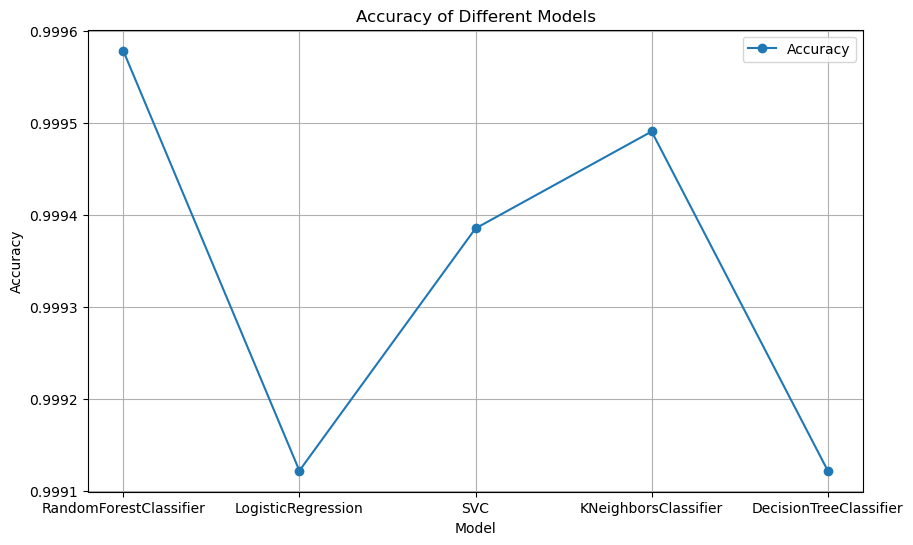

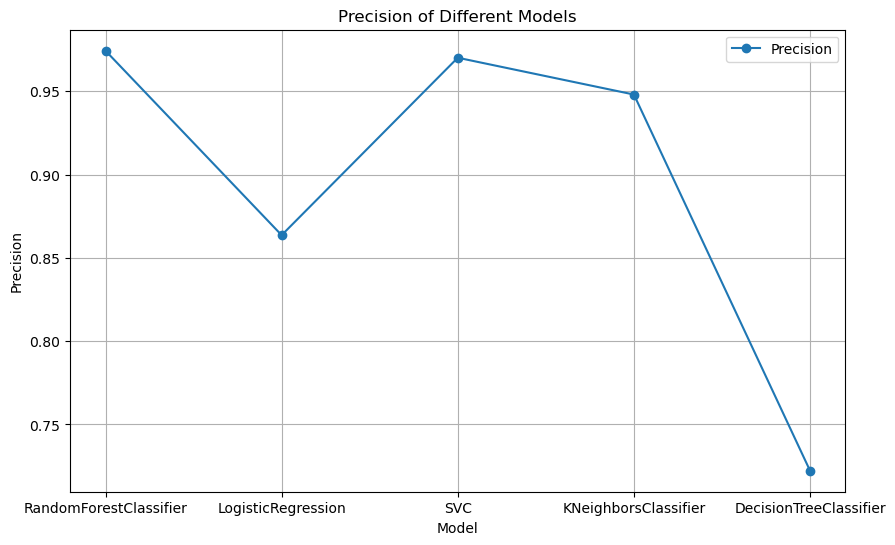

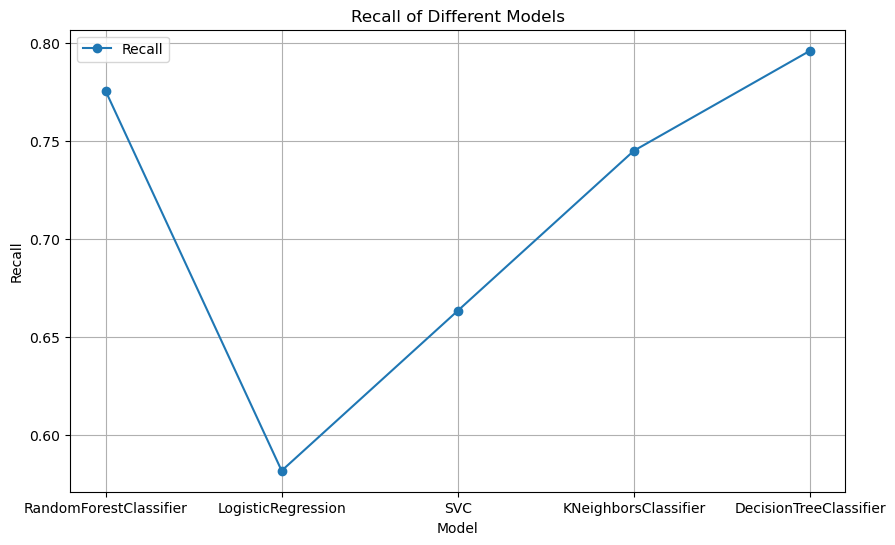

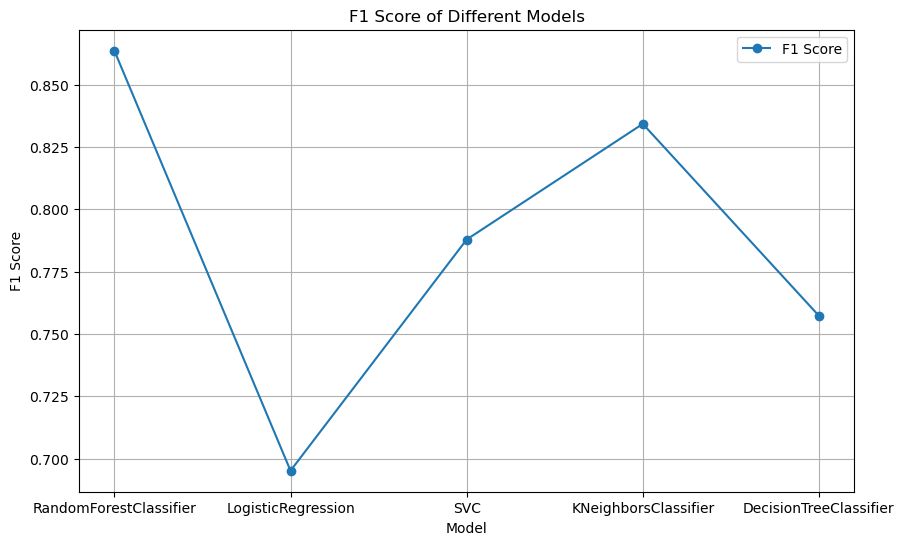

In [18]:
# Data for each model's merits
models = ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'KNeighborsClassifier', 'DecisionTreeClassifier']
accuracy = [0.9995786664794073, 0.9991222218320986, 0.999385555282469, 0.9994908886626171, 0.9991222218320986]
precision = [0.9743589743589743, 0.8636363636363636, 0.9701492537313433, 0.948051948051948, 0.7222222222222222]
recall = [0.7755102040816326, 0.5816326530612245, 0.6632653061224489, 0.7448979591836735, 0.7959183673469388]
f1_score = [0.8636363636363635, 0.6951219512195121, 0.7878787878787878, 0.8342857142857143, 0.7572815533980582]

# Create a line chart for accuracy
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy, marker='o', linestyle='-', label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.grid(True)
plt.legend()
plt.show()

# Create a line chart for precision
plt.figure(figsize=(10, 6))
plt.plot(models, precision, marker='o', linestyle='-', label='Precision')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
plt.grid(True)
plt.legend()
plt.show()

# Create a line chart for recall
plt.figure(figsize=(10, 6))
plt.plot(models, recall, marker='o', linestyle='-', label='Recall')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall of Different Models')
plt.grid(True)
plt.legend()
plt.show()

# Create a line chart for F1 score
plt.figure(figsize=(10, 6))
plt.plot(models, f1_score, marker='o', linestyle='-', label='F1 Score')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Models')
plt.grid(True)
plt.legend()
plt.show()

#### 3.8 Ensemble Learning : BaggingClassifier(knn)

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

# Define base model
knn = KNeighborsClassifier(n_neighbors=5)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the Bagging classifier
bagging_classifier = BaggingClassifier(estimator=knn, n_estimators=20)
bagging_classifier.fit(X_train, y_train)

# Make predictions
bagging_pred = bagging_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, bagging_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, bagging_pred)

print("Bagging Prediction Accuracy:", accuracy)
print("Bagging Prediction Precision:", precision)
print("Bagging Prediction Recall:", recall)
print("Bagging Prediction F1 Score:", f1_score)

Bagging Prediction Accuracy: 0.9995084442259752
Bagging Prediction Precision: [0.99959568 0.93421053]
Bagging Prediction Recall: [0.99991208 0.75531915]
Bagging Prediction F1 Score: [0.99975385 0.83529412]


###### 4.1 Plotting comparison charts for the different classifier models

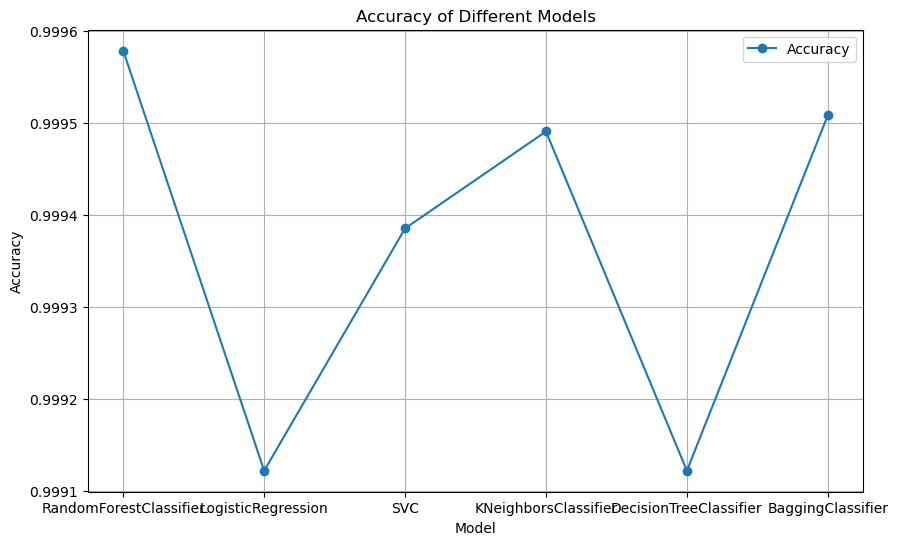

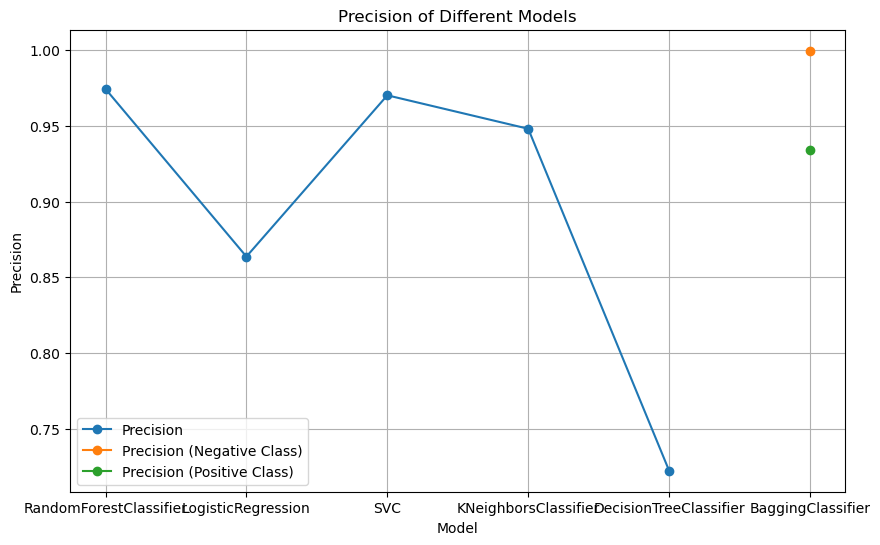

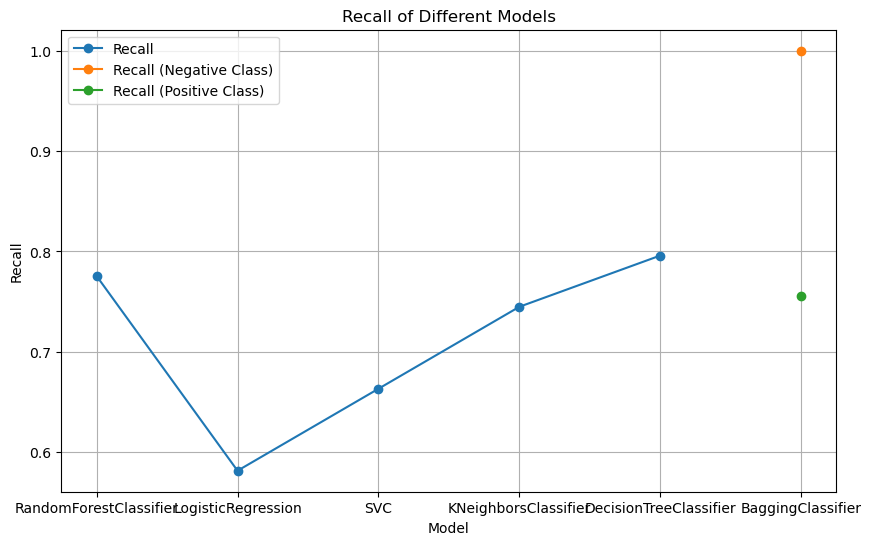

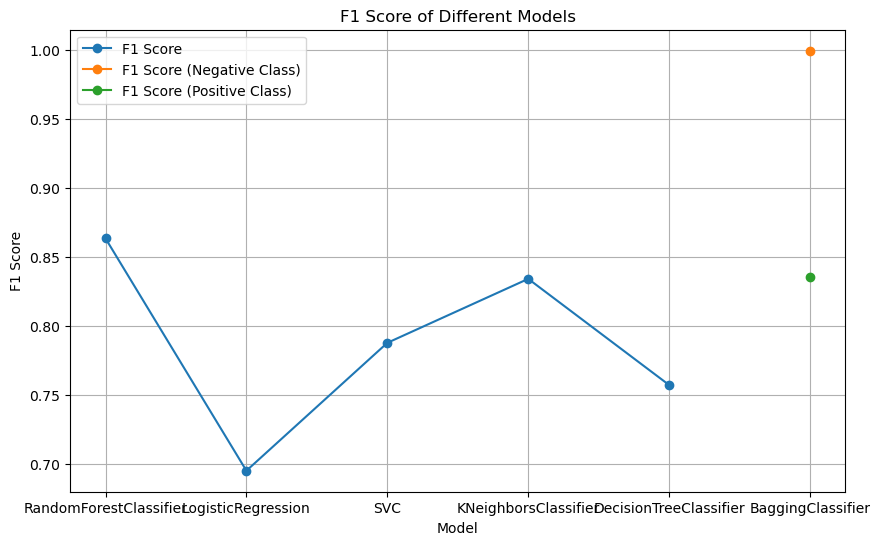

In [23]:
models = ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'BaggingClassifier'] 
accuracy = [0.9995786664794073, 0.9991222218320986, 0.999385555282469, 0.9994908886626171, 0.9991222218320986, 0.9995084442259752] 
precision = [0.9743589743589743, 0.8636363636363636, 0.9701492537313433, 0.948051948051948, 0.7222222222222222, [0.99959568, 0.93421053]] 
recall = [0.7755102040816326, 0.5816326530612245, 0.6632653061224489, 0.7448979591836735, 0.7959183673469388, [0.99991208, 0.75531915]] 
f1_score = [0.8636363636363635, 0.6951219512195121, 0.7878787878787878, 0.8342857142857143, 0.7572815533980582, [0.99975385, 0.83529412]]

#Create a line chart for accuracy
plt.figure(figsize=(10, 6)) 
plt.plot(models, accuracy, marker='o', linestyle='-', label='Accuracy') 
plt.xlabel('Model') 
plt.ylabel('Accuracy') 
plt.title('Accuracy of Different Models') 
plt.grid(True) 
plt.legend() 
plt.show()

#Create a line chart for precision
plt.figure(figsize=(10, 6)) 
plt.plot(models[:-1], precision[:-1], marker='o', linestyle='-', label='Precision') 
plt.plot(models[-1], precision[-1][0], marker='o', linestyle='-', label='Precision (Negative Class)') 
plt.plot(models[-1], precision[-1][1], marker='o', linestyle='-', label='Precision (Positive Class)') 
plt.xlabel('Model') 
plt.ylabel('Precision') 
plt.title('Precision of Different Models')
plt.grid(True)
plt.legend()
plt.show()

#Create a line chart for recall
plt.figure(figsize=(10, 6)) 
plt.plot(models[:-1], recall[:-1], marker='o', linestyle='-', label='Recall') 
plt.plot(models[-1], recall[-1][0], marker='o', linestyle='-', label='Recall (Negative Class)') 
plt.plot(models[-1], recall[-1][1], marker='o', linestyle='-', label='Recall (Positive Class)') 
plt.xlabel('Model')
plt.ylabel('Recall') 
plt.title('Recall of Different Models') 
plt.grid(True) 
plt.legend() 
plt.show()

#Create a line chart for F1 score
plt.figure(figsize=(10, 6)) 
plt.plot(models[:-1], f1_score[:-1], marker='o', linestyle='-', label='F1 Score')
plt.plot(models[-1], f1_score[-1][0], marker='o', linestyle='-', label='F1 Score (Negative Class)') 
plt.plot(models[-1], f1_score[-1][1], marker='o', linestyle='-', label='F1 Score (Positive Class)') 
plt.xlabel('Model') 
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Models')
plt.grid(True) 
plt.legend() 
plt.show()